In [1]:
stats1 = '/orions4-zfs/projects/optas/DATA/OUT/iclr/nn_models/testing_ae_settings/chair_conv_arch_0_2048_pts_bneck_512_chamfer/train_stats.txt'
stats2 = '/orions4-zfs/projects/optas/DATA/OUT/iclr/nn_models/testing_ae_settings/chair_conv_arch_0_dropout_w_bnorm_2048_pts_bneck_512_chamfer/train_stats.txt'
stats3 = '/orions4-zfs/projects/optas/DATA/OUT/iclr/nn_models/testing_ae_settings/chair_conv_arch_0_with_dropout_2048_pts_bneck_512_chamfer/train_stats.txt'
stats4 = '/orions4-zfs/projects/optas/DATA/OUT/iclr/nn_models/testing_ae_settings/chair_no_bnorm_rep_old_2048_pts_bneck_512_chamfer_all_data/train_stats.txt'

In [2]:
import matplotlib.pylab as plt

In [3]:
%matplotlib inline

In [4]:
def read_plot_train_stats_file(in_f):
    held_out_string = 'On Held_Out:'
    train_stats = {'epochs': [], 'loss': []}
    held_out_stats = {'epochs': [], 'loss': []}
    with open(in_f, 'r') as fin:
        for line in fin:            
            if line.startswith(held_out_string):
                tokens = line.replace(held_out_string, '').split()
                held_out_stats['epochs'].append(tokens[0])
                held_out_stats['loss'].append(tokens[1])            
            else:
                tokens = line.split()
                train_stats['epochs'].append(tokens[0])
                train_stats['loss'].append(tokens[1])  
    
    return train_stats, held_out_stats

In [33]:
exp_stats = stats2

0.000391478
0.000793744


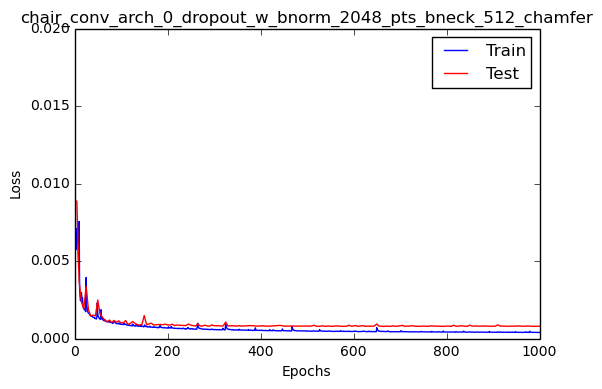

In [34]:
train_stats, held_stats = read_plot_train_stats_file(exp_stats)
plt.plot(train_stasts['epochs'], train_stats['loss'])
plt.plot(held_stats['epochs'], held_stats['loss'], 'r-')
plt.title(exp_stats.split('/')[-2])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
print train_stats['loss'][-1]
print held_stats['loss'][-1]